# Исследование рынка компьютерных игр

<dl>Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.</dl>
<dl>
<dl>Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.</dl>
<dl>
<dl>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».</dl>

## Изучение общей информации

In [1]:
import pandas as pd # Импортирую нужные для анализа библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv') # Читаю csv файл

In [3]:
display(data.head(10)) # Вывожу первые 10 строк датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info() # Вывожу основную информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


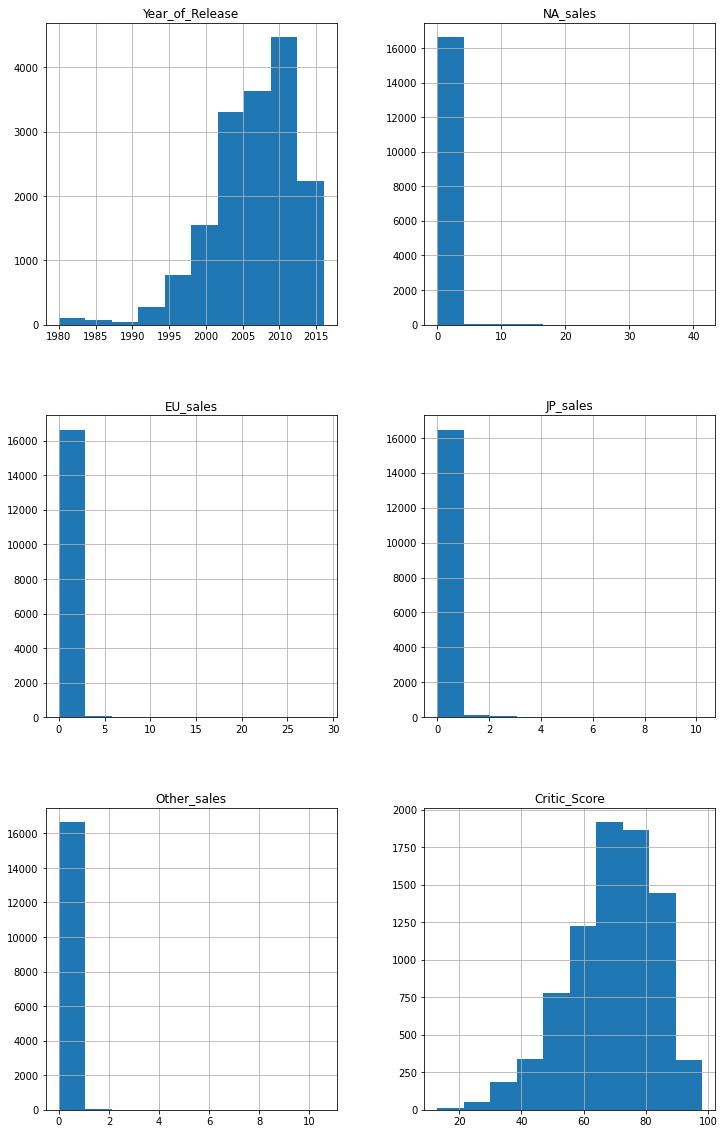

In [5]:
data.hist(figsize=(12, 20)); # Строю гистограммы по имеющимся данным

 Прблемы выявленные при первичном осмотре данных:
- Названия колонок не переведены к нижнему регистру;
- В столбце User_Score будем менять тип данных с object на float, что бы сравнивать числа;
- Присутствуют небольшие пропуски в данных у столбцов Year_of_Release и Genre;
- Гораздо больше данных пропущенно в столбцах с оценками/рейтингами (Critic_Score, User_Score, Rating);
- Столбец с годом выпуска игр нужно будет привести к целочисленным значениям.

## Предобработка данных

In [6]:
data.columns.tolist() # вывожу названия столбцов 

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [7]:
data.columns = data.columns.str.lower() # Привожу названия столбцов к нижнему регистру

- Прежде чем приступать к смене типов данных, нужно обработать пропуски

In [8]:
print(data.isna().sum().sort_values()) # Вывожу кол-во пропусков в столбцах

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64


In [9]:
data.isnull().sum().sort_values() / data.shape[0]*100 # Кол-вл пропусках в процентах

platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.011965
genre               0.011965
year_of_release     1.609333
user_score         40.089740
rating             40.478612
critic_score       51.319174
dtype: float64

- Игры без жанра можно будет удалить, так как это важная для анализа информация, а пропущенных значений всего 2 и, в процентном соотношении, мы потеряем не так много информации.
- Идентичная ситуация с играми без названий. Так же удалим.
- Игры без года релиза так же удалим, так как в процентном соотношении, потеряем не так много данных.

In [10]:
display(data.tail(10)) # Вывожу последние 10 строк датасета

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


- в столбце user_score есть непонятное значение "tbd", я бы уточнила, что это такое у разработчиков, единственное, что я нашла в интернете - Trunk Based Development. Но это подход к ветвлению кода, что не совсем подходит нам по контексту.
- предлагаю заменить непонятные значения tbd заменить на более привычные NaN, так как нужно привести все к числовому формату, для дальнейшего анализа данных.

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.nan) # Заменяю tbd на NaN

In [12]:
data['user_score'].sort_values().unique() # Вывожу уникальные значения солбца user_score

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [13]:
data['user_score'] = data['user_score'].astype('float') # Меняю тип данных на числовой

In [14]:
data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True) # Удаляю строки с пропусками даннх по столбцам

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int') # Меняю тип даннх на целые числа

In [16]:
data.info() # Повторно вывожу основную информацию после предварительной обработки данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


- По ходу обработки данных мы избавились от незначительных пропусков, привели все числовые данные к нужному для анализа формату.
- Остальсь посмотреть поближе текстовые значения в соответствующих стобцах.

In [17]:
data['rating'].sort_values().unique() # Вывожу уникальные значения солбца

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

- Явных дубликатов нет;
- Согласно классификации рейтинга присваемого играм, рейтина K-A уже нет. По значению K-A (Kids to Adults) совпадает с рейтингом Е (Everyone) - для возрастной категории старше 6 лет;(http://www.gamer.ru/everything/reytingi-esrb-ot-a-do-ya);
- Заменим K-A на E;
- Так же избавимся от значения NaN, так как это текстовый солбец, присвоим значение 'no rating', всем пропускам.

In [18]:
data['rating'] = data['rating'].replace('K-A', 'E') # Заменяю устаревший рейтинг'K-A' на актуальный 'E'
data['rating'] = data['rating'].fillna('no rating') # Заменяю пропуски в даннх

In [19]:
data['genre'].sort_values().unique() # Вывожу уникальные значения солбца genre

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

- В жанрах нет явных дубликатов, оставляем все так, как есть.

In [20]:
data['platform'].sort_values().unique() # Вывожу уникальные значения солбца platform

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

-В названиях платформ, так же, не вижу явных дубликатов, поэтому никаких изменений не вношу.

In [21]:
data['na_sales'] = data['na_sales'].fillna(0) # Заменяю все NaN на 0
data['eu_sales'] = data['eu_sales'].fillna(0)
data['jp_sales'] = data['jp_sales'].fillna(0)
data['other_sales'] = data['other_sales'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(-1) # Заменяю все NaN на -1
data['user_score'] = data['user_score'].fillna(-1)

Приняла решение заменить пропуски в колонках с оценками критиков и пользователей на -1, так как заменить их на 0 будет некорректно. Ранее я выводила оценки из этих колонок, которые варьируются от 0 до 10. Поэтоу присвоить какой-либо игре значение 0 = оценить ее. А вот оценку -1 мы легко сможем исключить из дальнейших расчетов, при этом избавимся от пропусков в данных.

In [22]:
data['sales_all'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1) # Добавляю новый столбец с суммой продаж по всем регионам.

In [23]:
display(data.sample(10)) # Вывожу 10 строк из датасета

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
6335,One Piece Unlimited Cruise 1: The Treasure Ben...,Wii,2008,Adventure,0.00,0.07,0.19,0.01,-1.0,-1.0,no rating,0.27
13431,Arcana Famiglia: La storia della Aracana Famiglia,PSP,2011,Adventure,0.00,0.00,0.05,0.00,-1.0,-1.0,no rating,0.05
10443,Metal Slug 3,XB,2004,Shooter,0.08,0.02,0.00,0.00,76.0,5.1,T,0.10
1862,NBA Live 2001,PS2,2001,Sports,0.52,0.40,0.04,0.13,74.0,-1.0,E,1.09
6848,South Park: Chef's Luv Shack,N64,1999,Misc,0.19,0.05,0.00,0.00,-1.0,-1.0,no rating,0.24
3830,Metal Gear Solid 2: Substance,PS2,2002,Action,0.18,0.14,0.16,0.05,87.0,9.0,M,0.53
7091,Rune Factory: Tides of Destiny,PS3,2011,Role-Playing,0.14,0.00,0.07,0.02,55.0,7.9,E10+,0.23
5635,Wipeout 2,Wii,2011,Misc,0.30,0.00,0.00,0.02,-1.0,-1.0,E10+,0.32
10549,PDC World Championship Darts: Pro Tour,PS3,2010,Sports,0.00,0.08,0.00,0.02,-1.0,-1.0,no rating,0.10
8010,NASCAR Unleashed,Wii,2011,Racing,0.17,0.00,0.00,0.01,-1.0,-1.0,E,0.18


В ходе предобработки данных я:
- привела названия столбцов к нижнему регистру;
- удалила строки с пропусками в данных (name, genre, year_of_release). Так как, в процентном соотношении, удаление пропусков в этих столбцах не будет критичным, но при этом, данная операция, улучшит качество данных;
- не стала удалять данные в столбцах с оценками от критиков и пользователей. Вместо этого заменила пропуски значением -1.
- колонку с рейтингом привела к актуальному формату оценки (присутствовал устаревший формат К-А) и заменила пропуски в данных на значение no rating;
- округлила дату выхода игр до целых чисел, для более удобного анализа в последующем;
- проверила на дубликаты все оставшиеся колонки.

Причины пропусков данных по столбцам:
- name -предположу, что пропуски в этом столбце вызваны человеческим фактором, так как их ( пропусков) всего 2.
- genre - так же 2 пропуска в данных, возможно этим играм не смогли присвоить конкретный жанр, так как это были эксперементальные игры, сочетающие в себе несколько жанров.
- year_of_release - 269 пропусков, которые могли быть вызваны тем, что некоторые игры так и не дожили до релиза, а находились в открытой бете. Или это данные по очень старым играм, у которых год выхода неизвестен.
- user_score и critic_score - в этих столбцах очень много пропусков, которые могут быть вызваны тем, что во времена выхода игры, официально еще не оценивали ни критики, ни игроки. То есть, это очень старые игры, выходившие на заре игровой эпохи.
- rating - ситуация аналогична с оценками от играков и критиков. Скорее всего, большая часть пропусков пренадлежит тому промежутку времени, когда играм не присваивали возростной рейтинг.

Посчитала суммарные продажи во всех регионах и записала их в отдельный солбец.

## Анализ данных

### Посмотрим сколько игр выпускалось в разные годы.

In [24]:
game_count = data.groupby('year_of_release')['name'].count() # группирую данные по году выхода
print(game_count)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


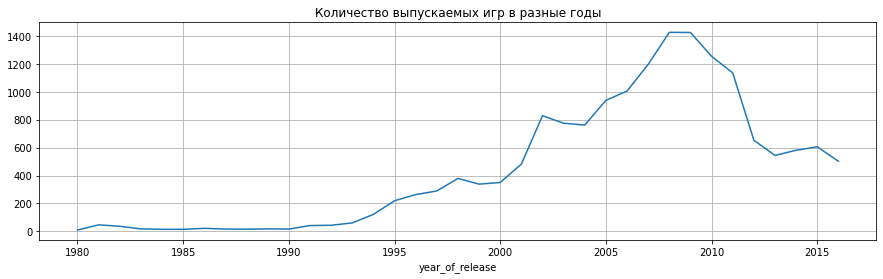

In [25]:
game_count.plot(kind='line', grid=True, figsize=(15,4));
plt.title('Количество выпускаемых игр в разные годы');

- Из графика четко видим, что с 1993 года начинается стабильный рост в количестве выпускаемых игр в год.
- В 2009 году рынок становится перенасыщен предложением игр плюс мировой кризис и общая динамика выпуска игр идет на спад.
- Для последующего анализа я брала бы данные за последние несколько лет, так как они буду наиболее репрезентативны (2013-2016).


### Посмотрим как менялись продажи по платформам

In [26]:
top_platform = data.groupby('platform')['sales_all'].sum().sort_values(ascending=False)
print(top_platform) # вывожу топ платформ по общему кол-ву продаж

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sales_all, dtype: float64


- Наибольшие суммарные продажи за весь анализируемый период  у следующих платформ:
- 1) PS2   -  1233.56
- 2) X360  -   961.24
- 3)PS3   -   931.34
- 4) Wii   -   891.18
- 5) DS   -    802.78
- 6) PS   -    727.58
- 7) PS4   -   314.14
- 8) GBA   -   312.88
- 9) PSP    -  289.53
- 10) 3DS  -    257.81

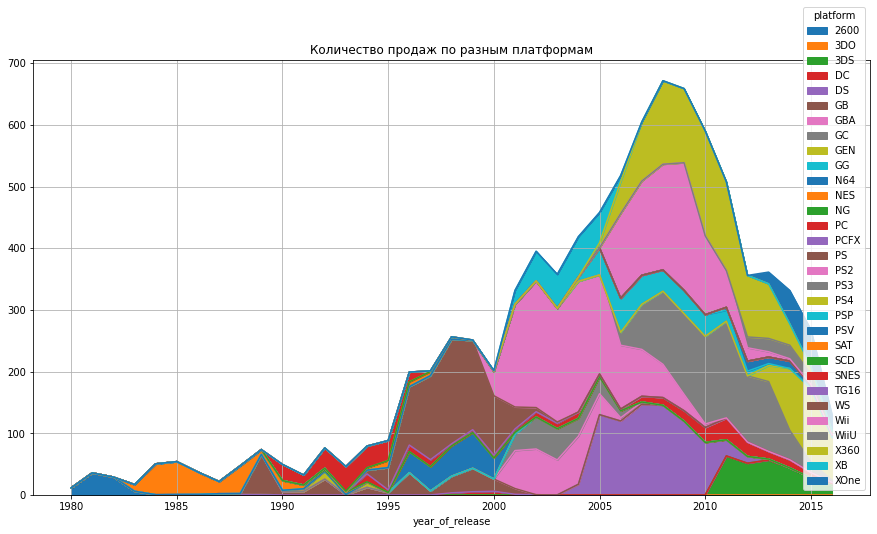

In [27]:
platform_sales = data.pivot_table(index='year_of_release', values='sales_all', columns='platform', aggfunc='sum')
platform_sales.plot(kind='area', grid=True, figsize=(15,8)); # строю сводную таблицу и график по ней
plt.title('Количество продаж по разным платформам');

- Слишком много данных на графике, выделю только интересующие для нас года.

In [28]:
display(platform_sales.fillna(0).head()) # заменяю все пропущенные значения на 0

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,35.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,28.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,5.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


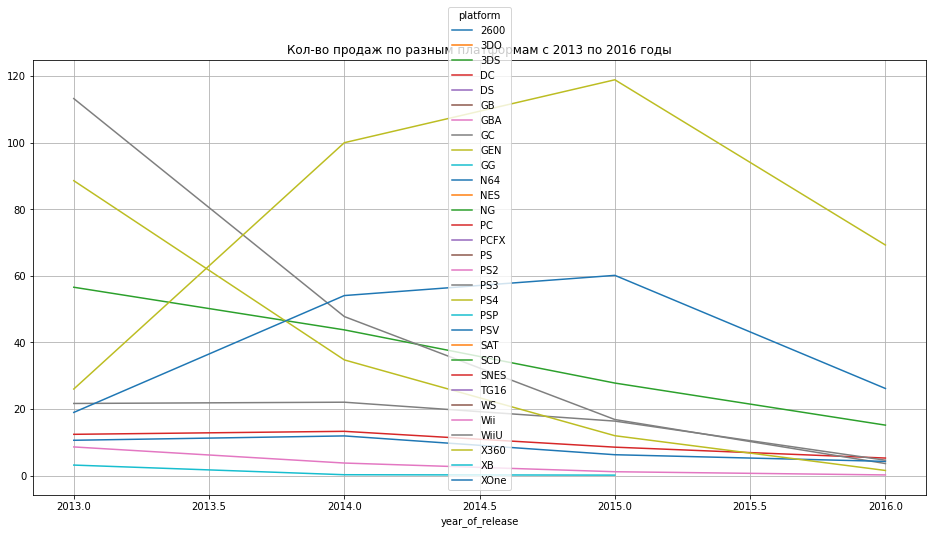

In [29]:
platform_sales = platform_sales.query('2013 <= year_of_release <= 2016')
platform_sales.plot(grid=True, figsize=(16,8));
plt.title('Кол-во продаж по разным платформам с 2013 по 2016 годы');

In [30]:
top_platform_new = data.query('2013 <= year_of_release <= 2016').groupby('platform')['sales_all'].sum().sort_values(ascending=False)
print(top_platform_new)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: sales_all, dtype: float64


- Если же мы берем не весь временной период, а только интересующие нас года (2013-2016), то ситуация с топовыми платформами выглядит совсем иначе.

Из графика видим, что:
- продажи по всем платформам, после 2015 года идут вниз;
- топ три лидирующие по продажам платформы : PS4, PS3 и XOne.
- как потенциально прибыльные платформы, я бы выделила PS4 и XOne. Исключила PS3, так как это более старая версия плейстейшн, а мы уже пришли к выводам, что у каждой платформы есть свой "жизненный цикл". Поэтому сделаем ставку на более молодую PS4.

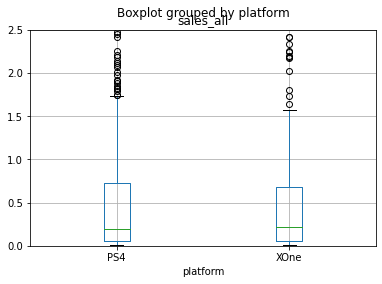

In [31]:
top_2_platform = data.query('platform == ["PS4", "XOne"] and 2013 <= year_of_release <= 2016')
top_2_platform.boxplot(column='sales_all', by='platform')
plt.ylim(0,2.5); # Строю диаграмму размаха для двух платформ

In [32]:
top_2_platform.groupby('platform')['sales_all'].describe() # основная информация о потенциально прибыльных платформах

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


- Построив график размаха по топ двум платформам, прихожу к выводу, что в глобальных продажах PS4 больше выбросов. Что вполне можно объяснить экслюзивными играми, которые доступны только на этой платформе;
- из-за выбросов, стандартное отклонение у PS4 больше;
- среднее у PS4 немного больше, чем у XOne;
- а вот медиана больше у XOne.

### Проанализируем корреляцию между отзывами критиков/пользователей и продажами игр

- Для анализа возьму платформу PS4, так как в интересующих нас годах она занимает лидирующие позиции.

In [33]:
ps4 = top_2_platform.query('platform == "PS4" and (user_score != -1 and critic_score != -1)') # делаю срез по платформе и # исключаю из расчетов оценки -1
ps4_good = ps4.pivot_table(index='critic_score', values='sales_all') # строю сводную таблицу

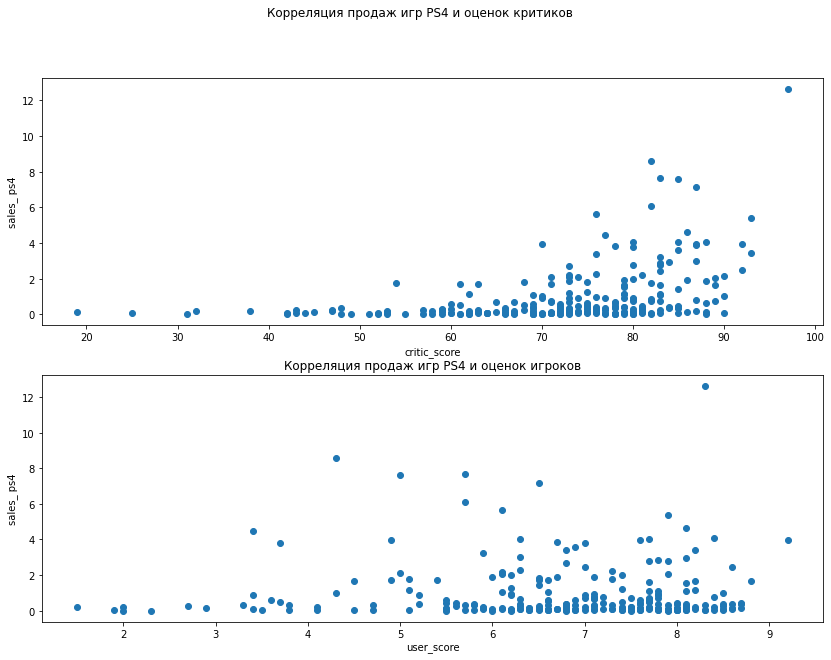

In [34]:
fig, ax = plt.subplots(2, figsize=(14,10)) # строю графики рассеяния
ax[0].scatter(x=ps4['critic_score'], y=ps4['sales_all'])
ax[0].set_xlabel('critic_score')
ax[0].set_ylabel('sales_ ps4')
plt.suptitle('Корреляция продаж игр PS4 и оценок критиков');

ax[1].scatter(x=ps4['user_score'], y=ps4['sales_all'])
ax[1].set_xlabel('user_score')
ax[1].set_ylabel('sales_ ps4')
plt.title('Корреляция продаж игр PS4 и оценок игроков');

In [35]:
print('Корреляция продаж игр с оценкой от критиков:', ps4['critic_score'].corr(ps4['sales_all']))
print('Корреляция продаж игр с оценкой от пользователей:', ps4['user_score'].corr(ps4['sales_all']))

Корреляция продаж игр с оценкой от критиков: 0.40589480145836687
Корреляция продаж игр с оценкой от пользователей: -0.03362497596528878


Исходя из полученных данных, прихожу к следующим выводам:
- Продажи игр имеют слабую положительную корреляцию с отзывами от критиков. Тоесть, игроки скорее склонны доверять мнению экспертов и охотнее покупают игры, если их рекомендуют критики.
- А вот корреляция продаж игр с отзывами от пользователей слабо отрицательная. То есть, игроки не прислушиваются к мениям других игроков на счет игр.

### Соотнесем полученные выводы с продажими на других платформах

In [36]:
data.query('2013 <= year_of_release <= 2016').groupby('platform')['sales_all'].describe() # группирую данные по платформам за интересующий нас период

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


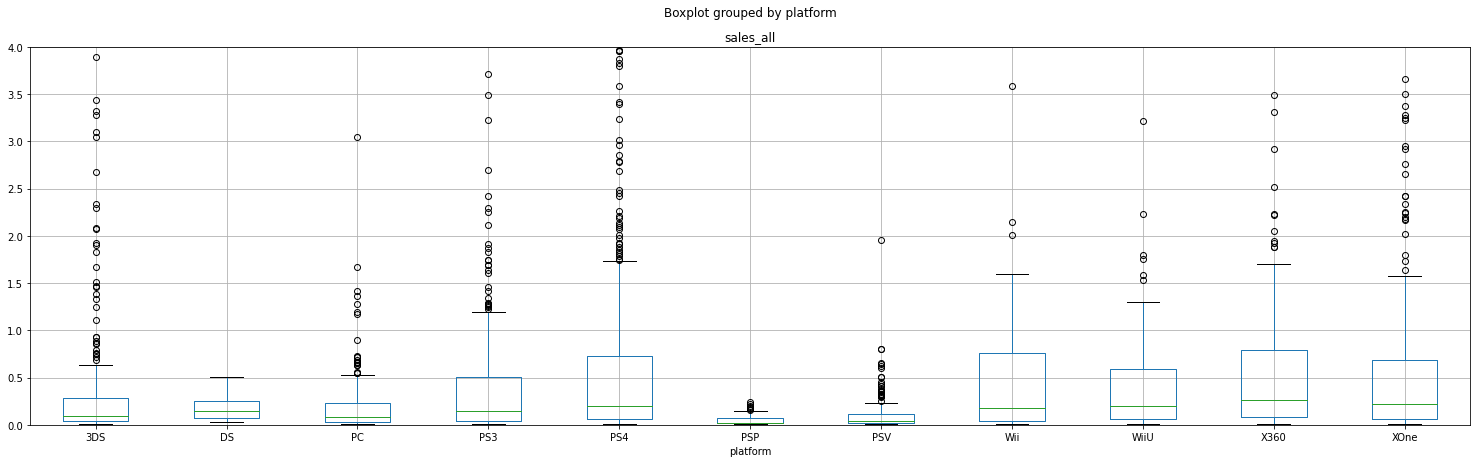

In [37]:
data.query('2013 <= year_of_release <= 2016').boxplot(column='sales_all', by='platform', figsize=(25,7)) # стррою диаграммы размаха
plt.ylim(0, 4);

Из диаграммы четко видно, что:
- выделяются несколько платформ (PS3, X360, PS4, 3DS); 
- у всех выделеных платформ достаточно большое, на фоне всех платформ, стандартное отклонение. Что говорит о больших выбросах; 
- наличие выбросов объясняется тем, что выходят игры в разных жанрах, так же появляются абсолютно новые жанры, которые могут очень тепло приниматься аудиторией. Усовершенсвуются движки, на которых выходят игры, как следствие улучшается и качество игр, что, так же, может приводить к "буму" продаж.

### Посмотрим на распределение игр по жанрам

In [38]:
genre_median = data.query('2013 <= year_of_release <= 2016').pivot_table(index='genre', values='sales_all', aggfunc='median') # группирую данные по жанрам
print(genre_median)

              sales_all
genre                  
Action            0.110
Adventure         0.030
Fighting          0.125
Misc              0.100
Platform          0.225
Puzzle            0.060
Racing            0.120
Role-Playing      0.125
Shooter           0.450
Simulation        0.100
Sports            0.240
Strategy          0.080


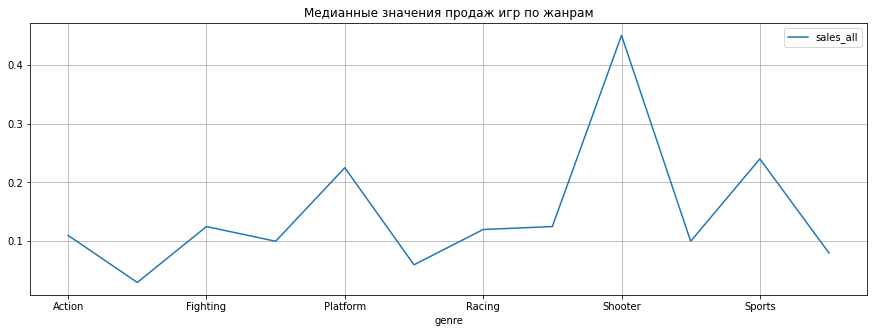

In [39]:
genre_median.plot(grid=True, figsize=(15, 5));
plt.title('Медианные значения продаж игр по жанрам');

Из графиков суммы продаж игр по жанрам можно сказать, что:
- лучге всего продаются Шутеры (Shooter), Платформеры (Platform ) и Спортивные игры (Sports);
- меньше всего фанатов у Приключений (Adventure), Пазлы (Puzzle) и Стратегии (Strategy).

Вывод
- Количество выпускаемых игр увеличивалось с каждым годом. Особенно интенсивный рост наблюдается с 1993 по 2009 года. Финансово-экономический кризис дает о себе знать и в индустрии игр. После 2009 года рынок перенасыщен играми + кризис = отрицательная динамика выпуска игр от года к году.
- Практически каждый год появляются какие-то новые игровые платформы, поэтому и продажи по платформам меняются с каждым годом. Средний срок жизни платформы = около пяти лет. Есть платформы, которые выбиваются в абсолютные лидеы и только крепнут со временем (PS4, XOne) , а есть аутсайдеры, которые перестают поддерживаться(PCFX, GG, 3DO).
- За актуальный период я взяла 2013-2016 годы. На основе этого временногоо периода и будем строить дальнейшую аналитику.
- По ходу анализа данных я выбрала две потенциально прибыльные платформы - PS4, XOne. Несмотря на то, что доходы от продаж на этих платформах уменьшаются ( как и по всем остальным платформам), PS4, XOne находятся на стабильно высоком уровне.
- Так же пришла к выводам, что небольшая доля игроков, при выборе игры, склонна опираться на мнение критиков, а вот мнение других игроков уже не так важно.
- В распределении по жанрам, с большим отрывом лидируют шуттеры. Самое время для запуска PUBG: Battlegrounds, Destiny 2 и многого другого в этом жанре. Так же можно сделать ставку на платформеры ( Hollow Knight, Cuphead, Getting Over It with Bennett Foddy и прочее).

## Составим портрет пользователя каждого региона

### Определим популярные платформы для каждого региона

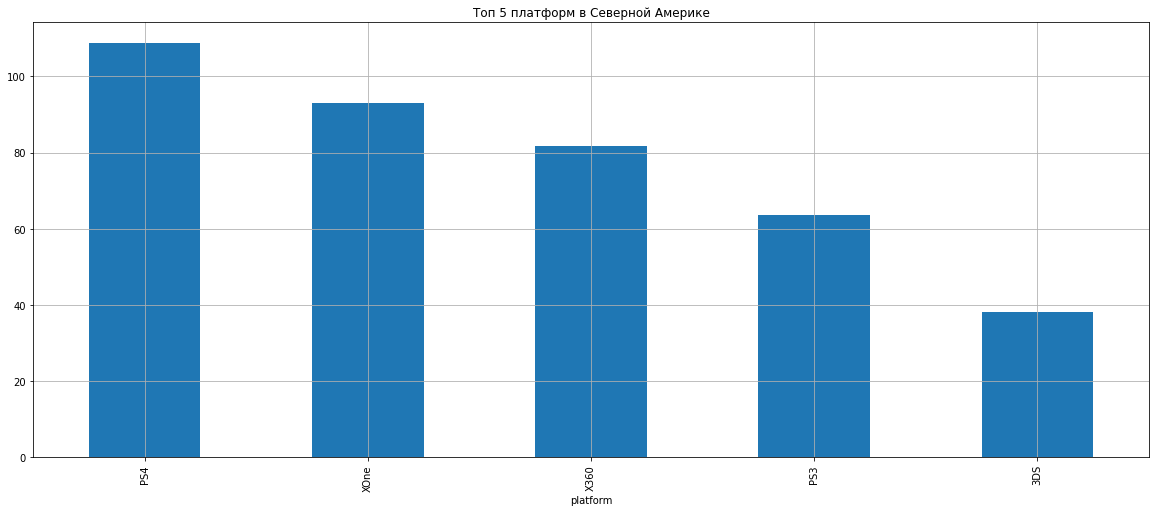

In [40]:
na_platform = data.query('2013 <= year_of_release <= 2016').groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
na_platform.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True);
plt.title('Топ 5 платформ в Северной Америке');
# делаю срез по актуальному периоду и группирую данные по топ 5 платформам.
# строю график по полученным данным

- Лидирующие платформы в Северной Америке выглядят следующим образом

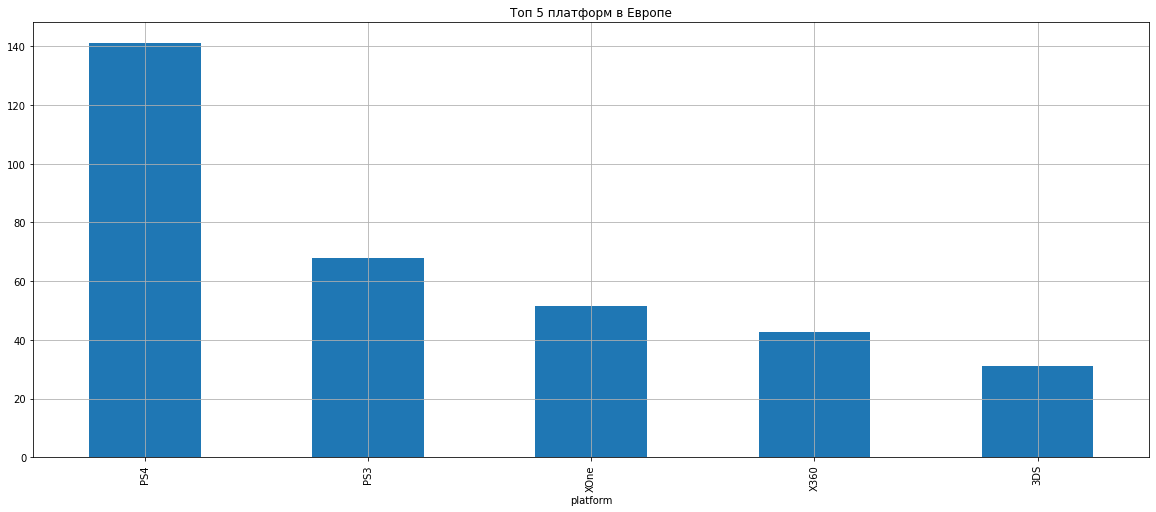

In [41]:
eu_platform = data.query('2013 <= year_of_release <= 2016').groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_platform.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True);
plt.title('Топ 5 платформ в Европе');

- Лидирующие платформы в Европе выглядят следующим образом

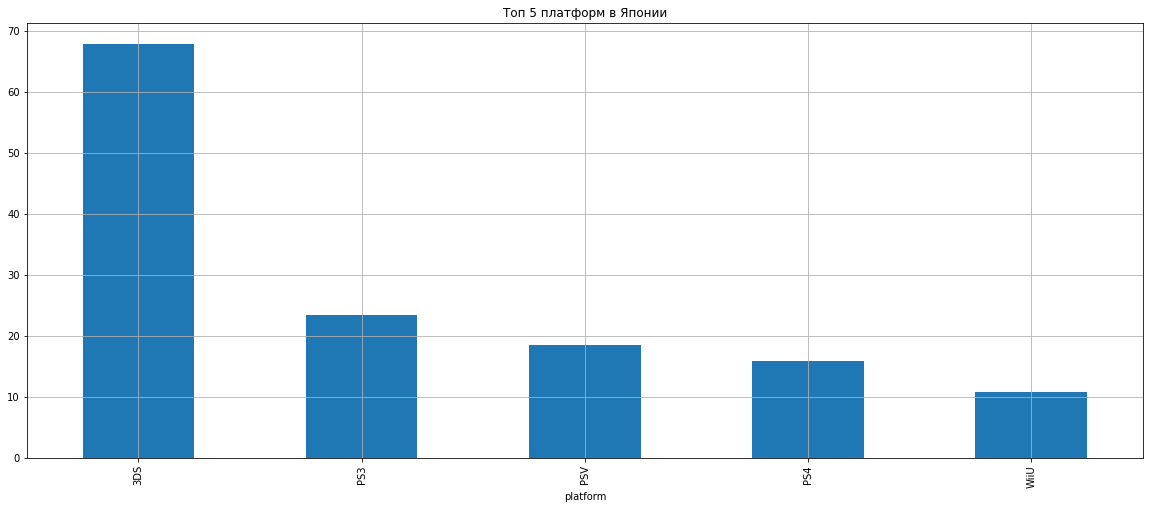

In [42]:
jp_platform = data.query('2013 <= year_of_release <= 2016').groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_platform.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True);
plt.title('Топ 5 платформ в Японии');

- Лидирующие платформы в Японии выглядят следующим образом

In [43]:
platform_all = data.query('2013 <= year_of_release <= 2016').groupby('platform')['sales_all'].sum()
na_proc = na_platform / platform_all * 100
print(na_proc.sort_values(ascending=False).head())

platform
X360    59.692982
XOne    58.448406
PS3     34.999724
PS4     34.615140
3DS     26.666667
dtype: float64


In [44]:
eu_proc = eu_platform / platform_all * 100
print(eu_proc.sort_values(ascending=False).head())

platform
PS4     44.913096
PS3     37.375296
XOne    32.381371
X360    31.081871
3DS     21.612565
dtype: float64


In [45]:
jp_proc = jp_platform / platform_all * 100
print(jp_proc.sort_values(ascending=False).head())

platform
PSV     56.350409
3DS     47.336824
WiiU    16.834287
PS3     12.869977
PS4      5.080537
dtype: float64


- В Северной Америке любимой большинством игроков платформой является - X360, с небольшим отрывом от нее идет XOne с долями продаж 59% и 58% от общего кол-ва продаж по этой платформе, соответственно. Немного отстают PS3 и PS4.

- В Европе преобладают продажи у платформ PS4 и PS3. Доля от общих продаж 44 и 37 % соответственно. Далее идут XOne и X360. Европейские игроки ведут себя зеркально Северно Американским.

- В Японии лидирует PSV - портативная приставка, которую удобно носить с собой. Здесь для продаж игр для этой платформы составляет - 56% от общей суммы продаж. Далее идет платворма 3DS с долей в 47 процентов от общих продаж. WiiU -16% . А вот PS3 b PS4 не так популярны как в Европе и Америке, но ходят в топ 5 платформ.

### Определим популярные жанры по регионам

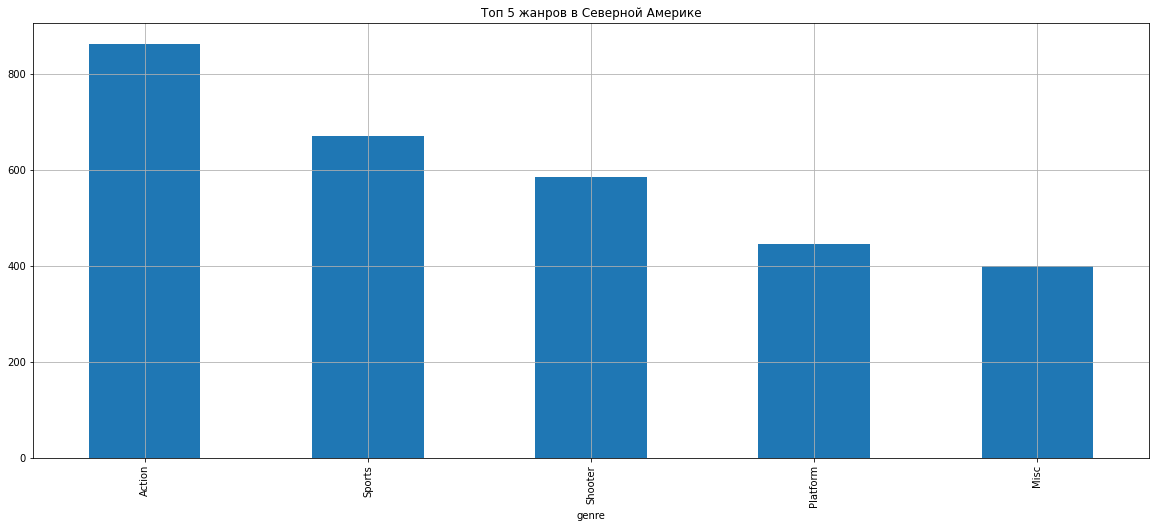

In [46]:
na_genre = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
na_genre.plot(x='genre', y='na_sales', kind ='bar', figsize=(20,8), grid=True);
plt.title('Топ 5 жанров в Северной Америке');

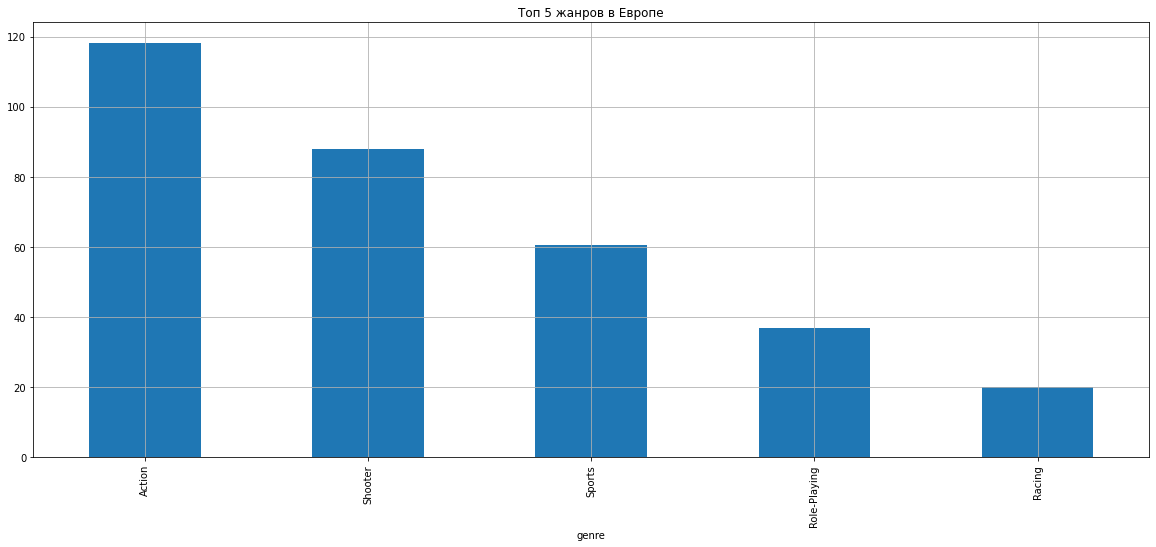

In [47]:
eu_genre = data.query('2013 <= year_of_release <= 2016').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_genre.plot(x='genre', y='eu_sales', kind ='bar', figsize=(20,8), grid=True);
plt.title('Топ 5 жанров в Европе');

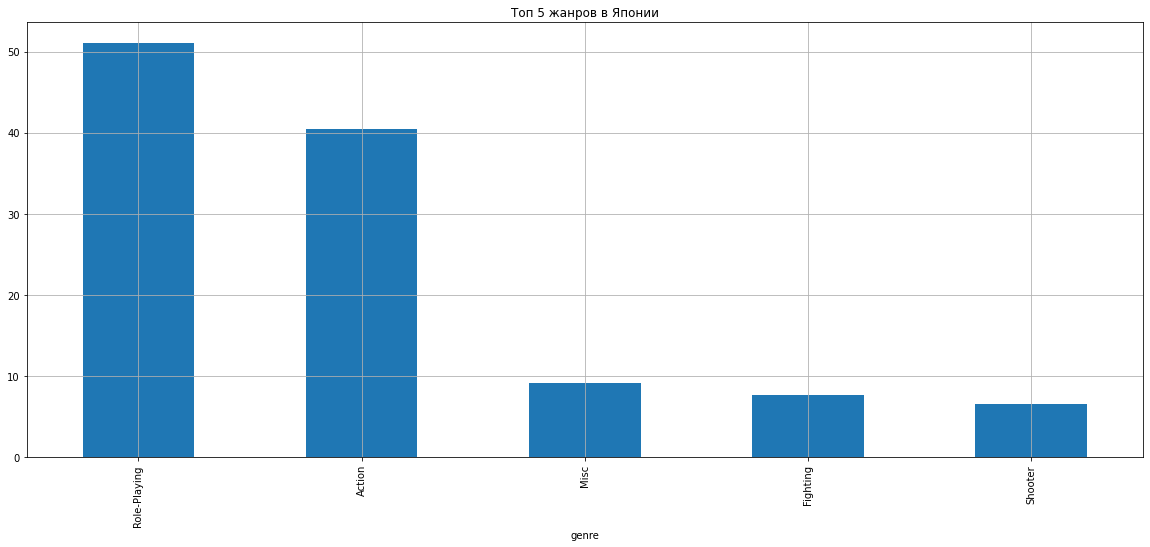

In [48]:
jp_genre = data.query('2013 <= year_of_release <= 2016').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_genre.plot(x='genre', y='jp_sales', kind ='bar', figsize=(20,8), grid=True);
plt.title('Топ 5 жанров в Японии');

In [49]:
genre_all = data.query('2013 <= year_of_release <= 2016').groupby('genre')['sales_all'].sum()
na_gp = na_genre / genre_all * 100
print(na_gp.sort_values(ascending=False).head())

genre
Platform    1042.552193
Misc         636.055396
Sports       445.536011
Action       268.173486
Shooter      251.021547
dtype: float64


In [50]:
eu_gp = eu_genre / genre_all * 100
print(eu_gp.sort_values(ascending=False).head())

genre
Racing          50.614189
Sports          40.172585
Shooter         37.711392
Action          36.701153
Role-Playing    25.341010
dtype: float64


In [51]:
jp_gp = jp_genre / genre_all * 100
print(jp_gp.sort_values(ascending=False).head())

genre
Role-Playing    34.985263
Fighting        21.665251
Misc            14.645018
Action          12.579613
Shooter          2.837153
dtype: float64


- Игроки из Северной Америки предпочитают Платформеры, Музыкальные игры и Спортивные.
- Игроки из Европы предпочитают Гонки, Спортивные игры и Шутеры.
- Игроки из Японии предпочитают Ролевые игры, Файтинги и игры связанные с музыкой.
- В каждом регионе ситуация с любимыми жанрами у игроков разнится.

### Оценим влияет ли рейтинг ESRB на продажи в отдельных регионах

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»).

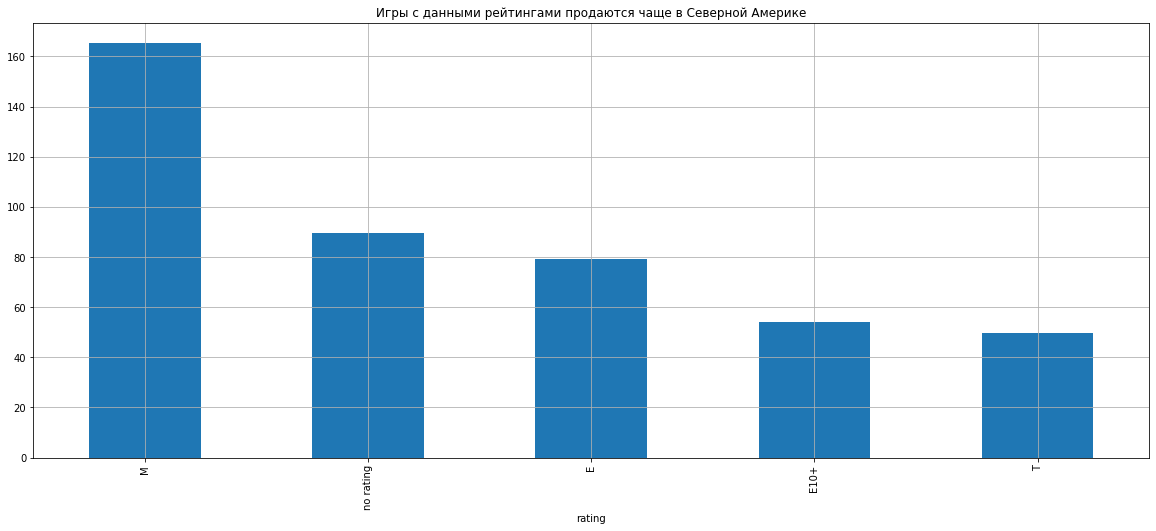

In [52]:
na_rating = data.query('2013 <= year_of_release <= 2016').groupby('rating')['na_sales'].sum().sort_values(ascending=False)
na_rating.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True);
plt.title('Игры с данными рейтингами продаются чаще в Северной Америке');

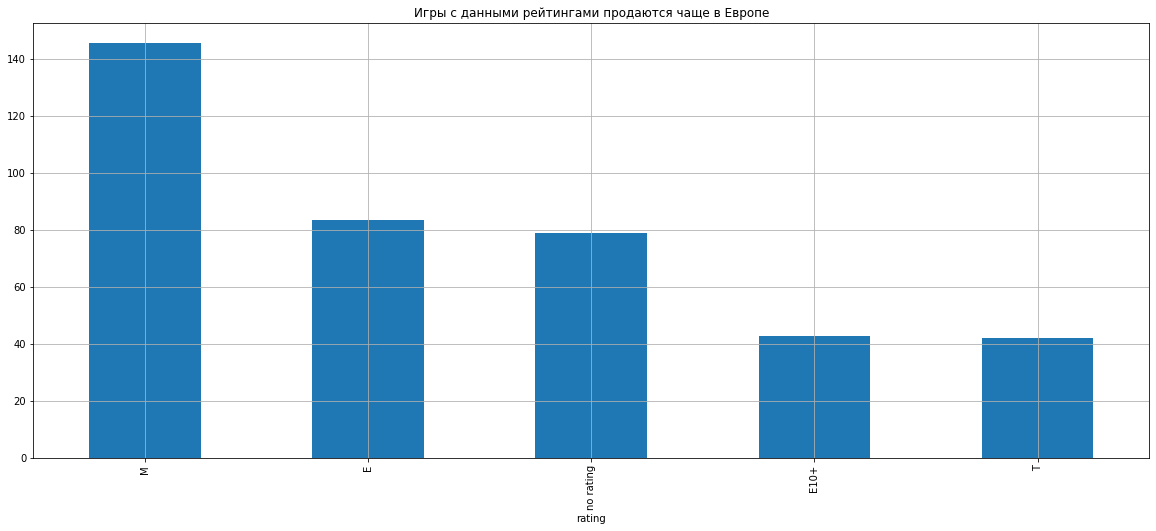

In [53]:
eu_rating = data.query('2013 <= year_of_release <= 2016').groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu_rating.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True);
plt.title('Игры с данными рейтингами продаются чаще в Европе');

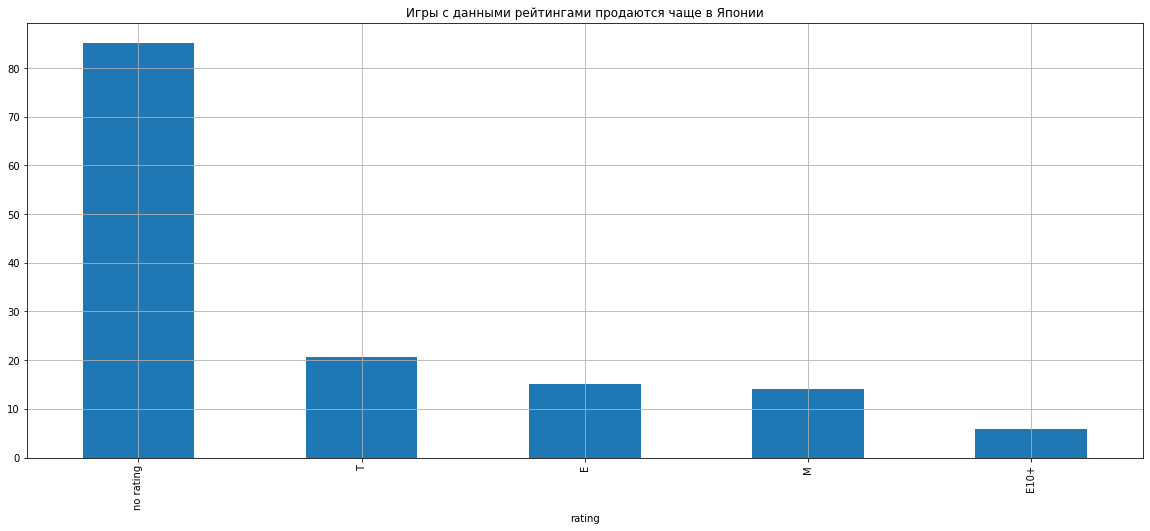

In [54]:
jp_rating = data.query('2013 <= year_of_release <= 2016').groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
jp_rating.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True);
plt.title('Игры с данными рейтингами продаются чаще в Японии');

- В Северной Америке больше всего продаж у игр с рейтингом M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.), следом идут игры, в которых жанры неопределенны и игры с рейтингом Е («Для всех»: Содержание вполне подходит для возрастной категории от 6 лет)
- В Европе лидируют в  продажах игры с рейтингом M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.), далее игры с рейтингом Е и игры в которых рейтинг не определен.
- В Японии чаще других продаются игры с неопределенным рейтингом, далее по популярности жанр T («Подросткам»: Игра подходит для лиц от 13 лет) и E («Для всех»: Содержание вполне подходит для возрастной категории от 6 лет)
- В общем и целом, топ 3 рейтинга во всех регионах похож, только в Японии немного выбивается из общей массы рейтинг Т.

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Для проверки гипотез буду использовать критерий Стьюдента так как для сравнения двух независимых выборок по заданной переменной - это наиболее удачный вариант так как:
- Исходные данные имеют нормальное распределение,
- Чаще всего применение t-критерия связано с проверкой равенства средних значений в двух выборках (как раз наш вариант).
- Функция принимает две выборки данных в качестве аргументов и возвращает вычисленную статистику и значение p.

- Проверка гипотез начинается с формулировки нулевой гипотезы H₀ - средние пользовательские рейтинги у платформ одинаковые
- Исходя из H₀ формулируется альтернативная гипотеза H₁ - средние пользовательские рейтинги у платформ разные

In [55]:
from scipy import stats as st
data_good = data.query('2013 <= year_of_release <= 2016')
xbox_one_score = data_good.loc[(data_good['platform'] == 'XOne') & (data_good['user_score'] != -1), 'user_score'] 
pc_score = data_good.loc[(data_good['platform'] == 'PC') & (data_good['user_score'] != -1), 'user_score']

results = st.ttest_ind(xbox_one_score,pc_score,equal_var=False)
alpha = 0.05 
print(results.pvalue)  
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

- H₀ - средние пользовательские рейтинги у жанров Экшен и Спорт одинаковые
- H₁ - средние пользовательские рейтинги у жанров Экшен и Спорт разные

In [56]:
games_action = data_good.loc[(data_good['user_score'] != -1) & (data_good['genre'] == "Action")]
games_sports = data_good.loc[(data_good['user_score'] != -1) & (data_good['genre'] == "Sports")]
action = games_action['user_score']
sports = games_sports['user_score']
results = st.ttest_ind(action, sports, equal_var=False)
alpha = 0.05

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


- Первая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтвердилась.
- Вторая гипотеза о том, что Средние пользовательские рейтинги жанров Action и Sports разные - не подтвердщилась.

## Общий вывод

- По ходу выполнения данного проекта, мы узнали много нового о том, как выглядит среднестатистический игрок в разных регионах, какие жарнры и рейтинги игр наиболее популярны. Узнали популярные платформы, общую динамику продаж игр. На основе всех полученных данных можем построить прогноз на следующий год. 
- За актуальные период для анализа я взяла период с 2013 по 2016 года. В этом временном промежутке выделила две самые популярные платформы - PS4 и XOne, как потенциально прибыльные на 2017 год. 
- Прогноз для Северной Америки на 2017 год выглядит следующим образом: платформа - X360/XOne, жанры - платформеры, музыкальные и спортивные игры, рейтинг - M, игры где рейтинг не определен.
- Прогноз для Европы на 2017 год выглядит следующим образом: платформа - PS4, жанры - гонки, спортивные игры и шутеры, рейтинг -M, Е.
- Прогноз для Японии на 2017 год выглядит следующим образом: платформа - PSV, жанры - ролевые игры, файтинги и музыкальные игры, рейтинг - рейинг не определен, Т.
- Так же, мы проверили две гипотезы: "средние пользовательские рейтинги платформ XOne и PC одинаковые", которая подтвердилась, что говорит о том, что рейтинги и правда одинаковые. И "средние пользовательские рейтинги жанров Action и Sports разные". Эта гипотеза не подтвердилась что говорит о том, что средние пользовательские рейтинги по  данным жанрам разные.